## Решающие деревья

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплиментацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Решение должно содержать:
* Ноутбук homework-practice-05-Username.ipynb
* Модуль hw5code.py

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__

In [280]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [281]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0., )
]

In [282]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

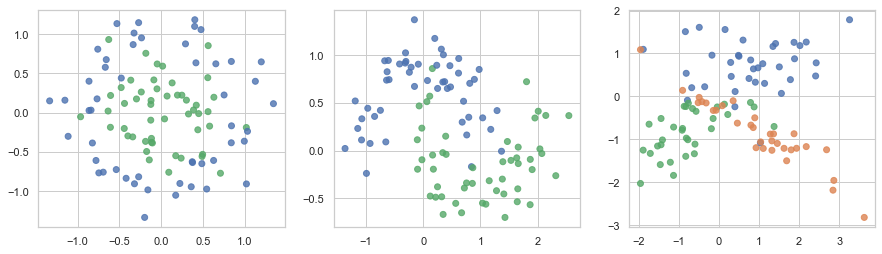

In [283]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [284]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

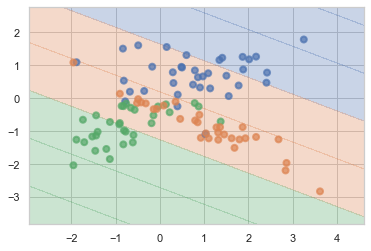

In [285]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

accuracy на обучающей выборке для 1 датасета 1.0
accuracy на тестовой выборке для 1 датасета 0.7333333333333333
accuracy на обучающей выборке для 2 датасета 1.0
accuracy на тестовой выборке для 2 датасета 0.8666666666666667
accuracy на обучающей выборке для 3 датасета 1.0
accuracy на тестовой выборке для 3 датасета 0.8333333333333334


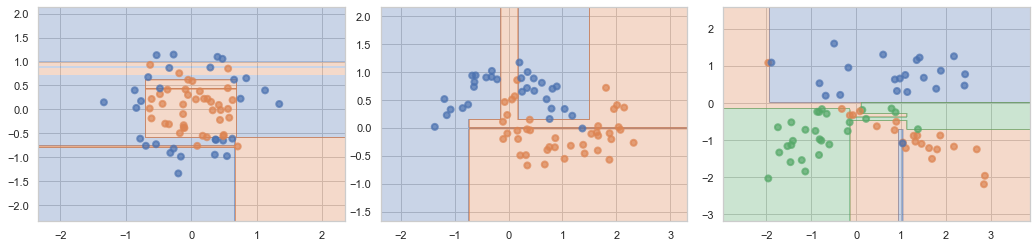

In [286]:
from sklearn.metrics import accuracy_score
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
    tree = DecisionTreeClassifier(random_state=42)
    tree.fit(x_train, y_train)
    plt.subplot(1, 3, i + 1)
    plot_surface(tree, x_train, y_train)
    pred_train = tree.predict(x_train)
    print(f"accuracy на обучающей выборке для {i+1} датасета", accuracy_score(y_train, pred_train))
    pred_test = tree.predict(x_test)
    print(f"accuracy на тестовой выборке для {i+1} датасета", accuracy_score(y_test, pred_test))

__Ответ:__ Точность на обучающей выборке 100%, а на тестовой чуть меньше (изменяется от 73% до 86% в зависимости от выбранного датасета). Деревья переобучились, мы видим, что значения на train и на test разнятся, на train значения больше, это говорит нам о том, что модель переобучилась.

__2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

### max_depth=2

accuracy на обучающей выборке для 1 датасета 0.8285714285714286
accuracy на обучающей выборке для 1 датасета 0.6333333333333333
accuracy на обучающей выборке для 2 датасета 0.9142857142857143
accuracy на обучающей выборке для 2 датасета 0.9333333333333333
accuracy на обучающей выборке для 3 датасета 0.9
accuracy на обучающей выборке для 3 датасета 0.7666666666666667


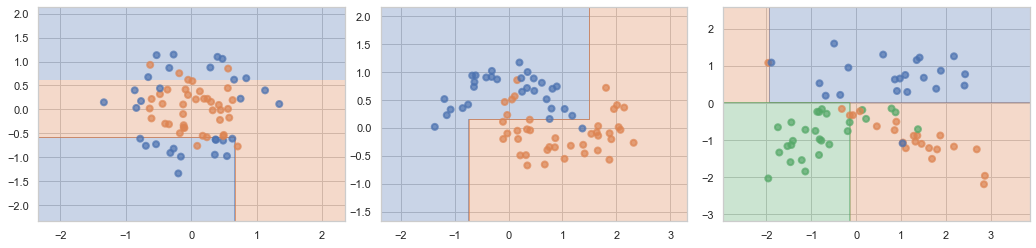

In [287]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
    tree = DecisionTreeClassifier(max_depth=2)
    tree.fit(x_train, y_train)
    plt.subplot(1, 3, i + 1)
    plot_surface(tree, x_train, y_train)
    pred_train = tree.predict(x_train)
    print(f"accuracy на обучающей выборке для {i+1} датасета", accuracy_score(y_train, pred_train))
    pred_test = tree.predict(x_test)
    print(f"accuracy на обучающей выборке для {i+1} датасета", accuracy_score(y_test, pred_test))

### max_depth=5

accuracy на обучающей выборке для 1 датасета 0.9714285714285714
accuracy на обучающей выборке для 1 датасета 0.7666666666666667
accuracy на обучающей выборке для 2 датасета 1.0
accuracy на обучающей выборке для 2 датасета 0.8666666666666667
accuracy на обучающей выборке для 3 датасета 0.9714285714285714
accuracy на обучающей выборке для 3 датасета 0.8


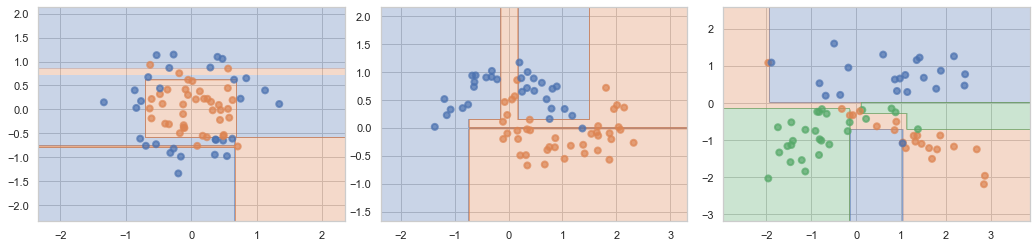

In [288]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
    tree = DecisionTreeClassifier(max_depth=5)
    tree.fit(x_train, y_train)
    plt.subplot(1, 3, i + 1)
    plot_surface(tree, x_train, y_train)
    pred_train = tree.predict(x_train)
    print(f"accuracy на обучающей выборке для {i+1} датасета", accuracy_score(y_train, pred_train))
    pred_test = tree.predict(x_test)
    print(f"accuracy на обучающей выборке для {i+1} датасета", accuracy_score(y_test, pred_test))

### max_depth=15

accuracy на обучающей выборке для 1 датасета 1.0
accuracy на обучающей выборке для 1 датасета 0.8
accuracy на обучающей выборке для 2 датасета 1.0
accuracy на обучающей выборке для 2 датасета 0.8666666666666667
accuracy на обучающей выборке для 3 датасета 1.0
accuracy на обучающей выборке для 3 датасета 0.8


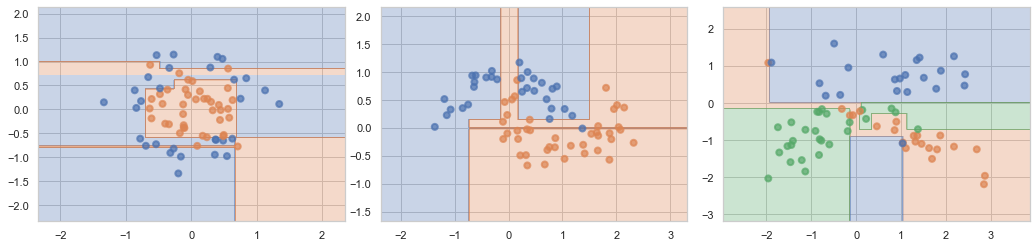

In [289]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
    tree = DecisionTreeClassifier(max_depth=15)
    tree.fit(x_train, y_train)
    plt.subplot(1, 3, i + 1)
    plot_surface(tree, x_train, y_train)
    pred_train = tree.predict(x_train)
    print(f"accuracy на обучающей выборке для {i+1} датасета", accuracy_score(y_train, pred_train))
    pred_test = tree.predict(x_test)
    print(f"accuracy на обучающей выборке для {i+1} датасета", accuracy_score(y_test, pred_test))

### min_samples_leaf=2

accuracy на обучающей выборке для 1 датасета 0.9428571428571428
accuracy на обучающей выборке для 1 датасета 0.8333333333333334
accuracy на обучающей выборке для 2 датасета 0.9857142857142858
accuracy на обучающей выборке для 2 датасета 0.7666666666666667
accuracy на обучающей выборке для 3 датасета 0.9142857142857143
accuracy на обучающей выборке для 3 датасета 0.8


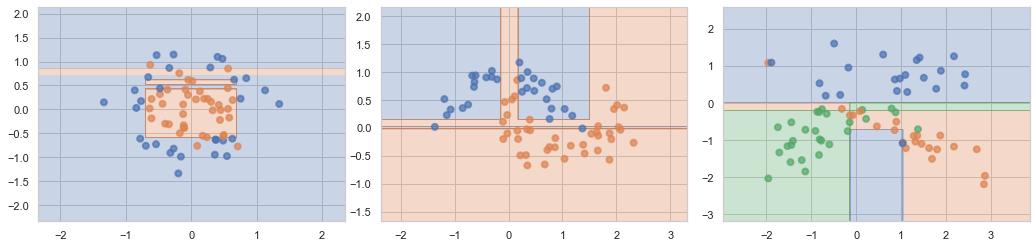

In [290]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
    tree = DecisionTreeClassifier(min_samples_leaf=2)
    tree.fit(x_train, y_train)
    plt.subplot(1, 3, i + 1)
    plot_surface(tree, x_train, y_train)
    pred_train = tree.predict(x_train)
    print(f"accuracy на обучающей выборке для {i+1} датасета", accuracy_score(y_train, pred_train))
    pred_test = tree.predict(x_test)
    print(f"accuracy на обучающей выборке для {i+1} датасета", accuracy_score(y_test, pred_test))

### min_samples_leaf=5

accuracy на обучающей выборке для 1 датасета 0.8714285714285714
accuracy на обучающей выборке для 1 датасета 0.9
accuracy на обучающей выборке для 2 датасета 0.9571428571428572
accuracy на обучающей выборке для 2 датасета 0.7333333333333333
accuracy на обучающей выборке для 3 датасета 0.9
accuracy на обучающей выборке для 3 датасета 0.7


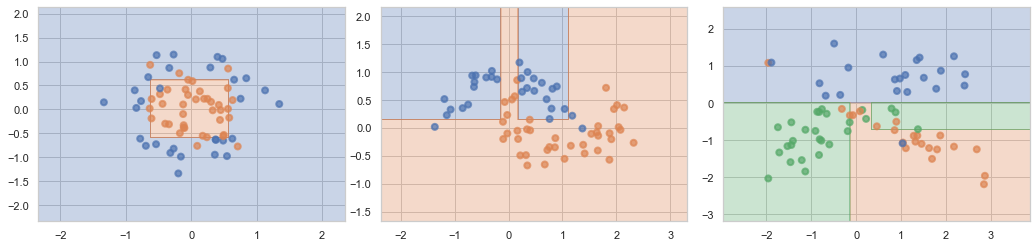

In [291]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
    tree = DecisionTreeClassifier(min_samples_leaf=5)
    tree.fit(x_train, y_train)
    plt.subplot(1, 3, i + 1)
    plot_surface(tree, x_train, y_train)
    pred_train = tree.predict(x_train)
    print(f"accuracy на обучающей выборке для {i+1} датасета", accuracy_score(y_train, pred_train))
    pred_test = tree.predict(x_test)
    print(f"accuracy на обучающей выборке для {i+1} датасета", accuracy_score(y_test, pred_test))

### min_samples_leaf=15

accuracy на обучающей выборке для 1 датасета 0.7857142857142857
accuracy на обучающей выборке для 1 датасета 0.7
accuracy на обучающей выборке для 2 датасета 0.8428571428571429
accuracy на обучающей выборке для 2 датасета 0.8
accuracy на обучающей выборке для 3 датасета 0.8857142857142857
accuracy на обучающей выборке для 3 датасета 0.7666666666666667


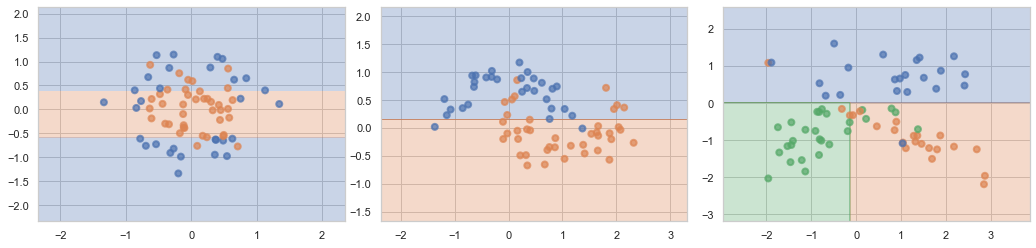

In [292]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
    tree = DecisionTreeClassifier(min_samples_leaf=15)
    tree.fit(x_train, y_train)
    plt.subplot(1, 3, i + 1)
    plot_surface(tree, x_train, y_train)
    pred_train = tree.predict(x_train)
    print(f"accuracy на обучающей выборке для {i+1} датасета", accuracy_score(y_train, pred_train))
    pred_test = tree.predict(x_test)
    print(f"accuracy на обучающей выборке для {i+1} датасета", accuracy_score(y_test, pred_test))

__Ответ:__ Взяли разную глубину деревьев и получилось, что чем меньше глубина решающего дерева, тем меньше используется порогов разбиения и тем выше, в среднем, обобщающая способность такого дерева. Взяли разное минимальное число объектов в листах, получилось, что чем больше это значение, тем выше обобщающие способности такого дерева. Таким образом, разделяющая поверхность при уменьшении глубины дерева и увеличениии минимального числа объектов в листах описывает данные более обобщенно, что позволяет говорить нам о хорошей обобщающей спсобности данного дерева. Минусам является то, что при увеличении одного параметра и при уменьшении другого наше дерево не всегда учитывает объекты-выбросы. 

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

Под критерием Джини здесь подразумевается следующая функция:
$$Q(R) = -\frac {|R_l|}{|R|}H(R_l) -\frac {|R_r|}{|R|}H(R_r)$$,
$R$ — множество объектов, $R_l$ и $R_r$ — объекты, попавшие в левое и правое поддерево,
 $H(R) = 1-p_1^2-p_0^2$, $p_1$, $p_0$ — доля объектов класса 1 и 0 соответственно.

Указания:
* Пороги, приводящие к попаданию в одно из поддеревьев пустого множества объектов, не рассматриваются.
* В качестве порогов, нужно брать среднее двух сосдених (при сортировке) значений признака
* Поведение функции в случае константного признака может быть любым.
* При одинаковых приростах Джини нужно выбирать минимальный сплит.
* За наличие в функции циклов балл будет снижен. Векторизуйте! :)

:param feature_vector: вещественнозначный вектор значений признака
:param target_vector: вектор классов объектов,  len(feature_vector) == len(target_vector)

:return thresholds: отсортированный по возрастанию вектор со всеми возможными порогами, по которым объекты можно
 разделить на две различные подвыборки, или поддерева
:return ginis: вектор со значениями критерия Джини для каждого из порогов в thresholds len(ginis) == len(thresholds)
:return threshold_best: оптимальный порог (число)
:return gini_best: оптимальное значение критерия Джини (число)

In [293]:
def find_best_split(feature_vector, target_vector):
    index_sort_value = np.argsort(feature_vector)
    feature_vector = feature_vector[index_sort_value]
    feature_vector_unique = np.unique(feature_vector)
    target_vector = target_vector[index_sort_value]
    thresholds = (feature_vector_unique[1:] + feature_vector_unique[:-1]) / 2
    if len(thresholds) == 0:
        return [],[], -np.inf, -np.inf
    
    R_l = feature_vector < thresholds.reshape(-1, 1)
    R_r = feature_vector > thresholds.reshape(-1, 1)
       
    p_0 = np.sum(R_l * (target_vector == 0), axis=1) / np.sum(R_l, axis=1)
    p_1 = 1 - p_0
    H_l = 1 - (p_1) ** 2 - (p_0) ** 2
    
    p_0 = np.sum(R_r * (target_vector == 0), axis=1) / np.sum(R_r, axis=1)
    p_1 = 1 - p_0
    H_r = 1 - (p_1) ** 2 - (p_0) ** 2
    
    ginis = -(np.sum(R_l, axis=1)) / (len(target_vector)) * H_l
    ginis -= (np.sum(R_r, axis=1)) / (len(target_vector)) * H_r
    
    index_max = np.argmax(ginis)
    threshold_best = thresholds[index_max]
    
    gini_best = np.max(ginis)

    return thresholds, ginis, threshold_best, gini_best 

__4. (0.5 балла)__

Загрузите таблицу [students.csv](https://drive.google.com/file/d/0B2zoFVYw1rN3a0d0Zm43TzQ4aUU/view?usp=sharing) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [294]:
import pandas as pd
students1 = pd.read_excel('students.xls', sheet_name='Training_Data')
students1

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,1
2,0.06,0.06,0.05,0.25,0.33,0
3,0.10,0.10,0.15,0.65,0.30,1
4,0.08,0.08,0.08,0.98,0.24,0
...,...,...,...,...,...,...
253,0.61,0.78,0.69,0.92,0.58,1
254,0.78,0.61,0.71,0.19,0.60,1
255,0.54,0.82,0.71,0.29,0.77,1
256,0.50,0.75,0.81,0.61,0.26,1


In [295]:
students2 = pd.read_excel('students.xls', sheet_name='Test_Data')
students2

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.10,0.50,0.26,0.05,0
1,0.05,0.05,0.55,0.60,0.14,0
2,0.08,0.18,0.63,0.60,0.85,1
3,0.20,0.20,0.68,0.67,0.85,1
4,0.22,0.22,0.90,0.30,0.90,1
...,...,...,...,...,...,...
140,0.90,0.78,0.62,0.32,0.89,1
141,0.85,0.82,0.66,0.83,0.83,1
142,0.56,0.60,0.77,0.13,0.32,0
143,0.66,0.68,0.81,0.57,0.57,1


In [296]:
students = pd.concat([
    students1,
    students2
])
students.reset_index()
students 

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,1
2,0.06,0.06,0.05,0.25,0.33,0
3,0.10,0.10,0.15,0.65,0.30,1
4,0.08,0.08,0.08,0.98,0.24,0
...,...,...,...,...,...,...
140,0.90,0.78,0.62,0.32,0.89,1
141,0.85,0.82,0.66,0.83,0.83,1
142,0.56,0.60,0.77,0.13,0.32,0
143,0.66,0.68,0.81,0.57,0.57,1


In [297]:
target_vector = np.array(students[' UNS'])
feature_vector = students.drop(columns=' UNS')

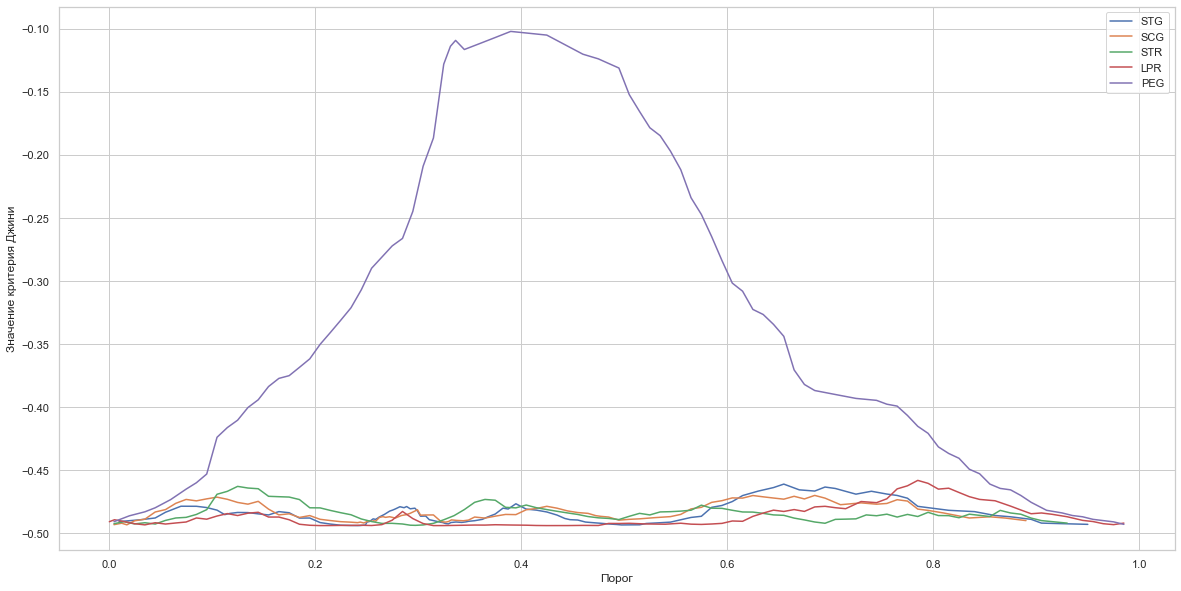

In [298]:
plt.figure(figsize=(20, 10))
for name_column in feature_vector.columns:
    thresholds, ginis, _, _ = find_best_split(np.array(feature_vector[name_column]), target_vector)
    plt.plot(thresholds, ginis, label=name_column)
    plt.xlabel("Порог")
    plt.ylabel("Значение критерия Джини")
plt.legend()

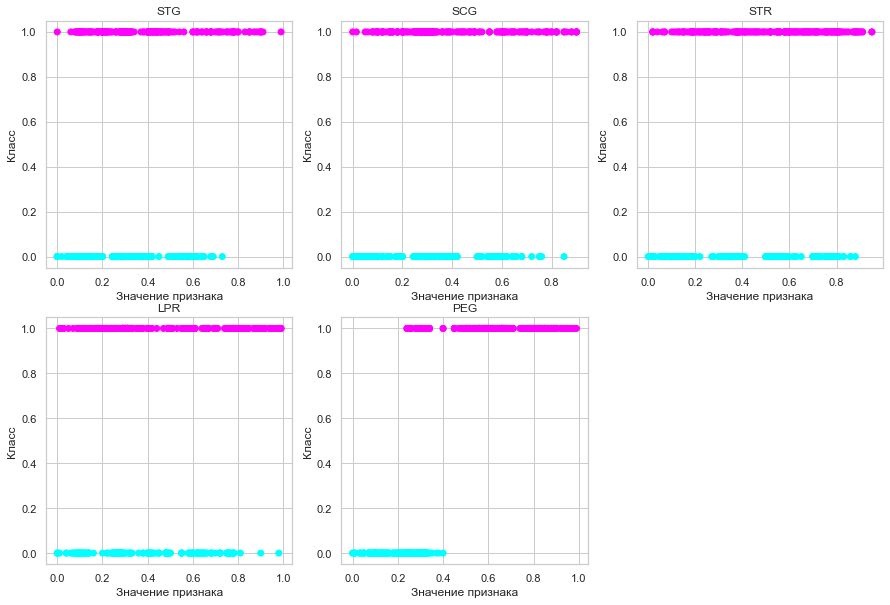

In [299]:
plt.figure(figsize=(15, 10))
for i, name_column in enumerate(feature_vector.columns):
    plt.subplot(2, 3, i + 1)
    plt.scatter(np.array(feature_vector[name_column]), target_vector,
                c=target_vector, cmap="cool")
    plt.title(name_column)
    plt.xlabel("Значение признака")
    plt.ylabel("Класс")

__5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:** Исходя из кривых значений критерия Джини, нужно проводить деление по признаку PEG. Этот результат согласуется с визуальной оценкой scatter-графиков, потому что значения этого признака можно разделить так, что в каждой из частей будут объекты одинакового класса. Кривая "хороших" признаков имеет ярко выраженную точку максимума.

__6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2016-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

### 

In [300]:
import numpy as np
from collections import Counter
from sklearn.base import BaseEstimator

def find_best_split(feature_vector, target_vector):
    index_sort_value = np.argsort(feature_vector)
    feature_vector = feature_vector[index_sort_value]
    feature_vector_unique = np.unique(feature_vector)
    target_vector = target_vector[index_sort_value]
    thresholds = (feature_vector_unique[1:] + feature_vector_unique[:-1]) / 2
    if len(thresholds) == 0:
        return [],[], -np.inf, -np.inf
    
    R_l = feature_vector < thresholds.reshape(-1, 1)
    R_r = feature_vector > thresholds.reshape(-1, 1)
       
    p_0 = np.sum(R_l * (target_vector == 0), axis=1) / np.sum(R_l, axis=1)
    p_1 = 1 - p_0
    H_l = 1 - (p_1) ** 2 - (p_0) ** 2
    
    p_0 = np.sum(R_r * (target_vector == 0), axis=1) / np.sum(R_r, axis=1)
    p_1 = 1 - p_0
    H_r = 1 - (p_1) ** 2 - (p_0) ** 2
    
    ginis = -(np.sum(R_l, axis=1)) / (len(target_vector)) * H_l
    ginis -= (np.sum(R_r, axis=1)) / (len(target_vector)) * H_r
    
    index_max = np.argmax(ginis)
    threshold_best = thresholds[index_max]
    
    gini_best = np.max(ginis)

    return thresholds, ginis, threshold_best, gini_best 

class DecisionTree(BaseEstimator):
    def __init__(self, feature_types, max_depth=None, min_samples_split=None, min_samples_leaf=None):
        if np.any(list(map(lambda x: x != "real" and x != "categorical", feature_types))):
            raise ValueError("There is unknown feature type")

        self._tree = {}
        self.feature_types = feature_types
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf

    def _fit_node(self, sub_X, sub_y, node):
        if np.all(sub_y == sub_y[0]):  # 2
            node["type"] = "terminal"
            node["class"] = sub_y[0]
            return

        if self.min_samples_split is not None and len(sub_y) <= self.min_samples_split:  # 4
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common(1)
            return

        feature_best, threshold_best, gini_best, split = None, None, None, None
        for feature in range(0, sub_X.shape[1]):  # 3
            feature_type = self.feature_types[feature]
            categories_map = {}

            if feature_type == "real":
                feature_vector = sub_X[:, feature]
            elif feature_type == "categorical":
                counts = Counter(sub_X[:, feature])
                clicks = Counter(sub_X[sub_y == 1, feature])
                ratio = {}
                for key, current_count in counts.items():
                    if key in clicks:
                        current_click = clicks[key]
                        ratio[key] = current_count / current_click
                    else:
                        ratio[key] = 0
                sorted_categories = sorted(ratio.keys(), key=lambda x: ratio[x])
                categories_map = dict(zip(sorted_categories, list(range(len(sorted_categories)))))

                feature_vector = np.array(list(map(lambda x: categories_map[x], sub_X[:, feature])))
            else:
                raise ValueError

            _, _, threshold, gini = find_best_split(feature_vector, sub_y)
            if gini_best is None or gini > gini_best:
                feature_best = feature
                gini_best = gini
                split = feature_vector < threshold

                if feature_type == "real":
                    threshold_best = threshold
                elif feature_type == "categorical":
                    threshold_best = list(map(lambda x: x[0],
                                              filter(lambda x: x[1] < threshold, categories_map.items())))
                else:
                    raise ValueError

        if feature_best is None:
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common(1)
            return

        node["type"] = "nonterminal"

        node["feature_split"] = feature_best
        if self.feature_types[feature_best] == "real":
            node["threshold"] = threshold_best
        elif self.feature_types[feature_best] == "categorical":
            node["categories_split"] = threshold_best
        else:
            raise ValueError
        node["left_child"], node["right_child"] = {}, {}
        self._fit_node(sub_X[split], sub_y[split], node["left_child"])
        self._fit_node(sub_X[np.logical_not(split)], sub_y[np.logical_not(split)], node["right_child"])  # 1

    def _predict_node(self, x, node):
        if node["type"] == "terminal":
            return node["class"]
        else:
            feature_split = node["feature_split"]
            if self.feature_types[feature_split] == "real":
                threshold = node["threshold"]
            elif self.feature_types[feature_split] == "categorical":
                threshold = node["categories_split"]
                if x[feature_split] in threshold:
                    return self._predict_node(x, node["left_child"])
                else:
                    return self._predict_node(x, node["right_child"])
            else:
                raise ValueError
            if x[feature_split] < threshold:
                return self._predict_node(x, node["left_child"])
            else:
                return self._predict_node(x, node["right_child"])

    def fit(self, X, y):
        self._fit_node(X, y, self._tree)

    def predict(self, X):
        predicted = []
        for x in X:
            predicted.append(self._predict_node(x, self._tree))
        return np.array(predicted)

__7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [301]:
mushrooms = pd.read_csv('mushroom.data')

In [302]:
mushrooms

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8119,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8120,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8121,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [303]:
from sklearn.preprocessing import LabelEncoder

In [304]:
le = LabelEncoder()
for name_column in mushrooms.columns:
     mushrooms[name_column] = le.fit_transform(mushrooms[name_column])
mushrooms

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
1,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
2,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
3,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
4,0,5,3,9,1,0,1,0,0,5,...,2,7,7,0,2,1,4,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8119,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8120,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8121,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [305]:
Y = np.array(mushrooms["p"])
X = mushrooms.drop(columns="p")

X_train, X_test, Y_train, Y_test = train_test_split(np.array(X), Y, test_size=0.5, random_state=42)

In [306]:
types = ['real' for i in range(X_train.shape[1])]
dt = DecisionTree(types)
dt.fit(X_train, Y_train)
pred_train = dt.predict(X_train)
print("accuracy на обучающей выборке", accuracy_score(Y_train, pred_train))
pred_test = dt.predict(X_test)
print("accuracy на тестовой выборке", accuracy_score(Y_test, pred_test))

accuracy на обучающей выборке 1.0
accuracy на тестовой выборке 1.0


__14. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

__15. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце),
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [307]:
Y_mushroom = Y
X_mushroom = X

In [308]:
tic_tac_toe = pd.read_csv('tic-tac-toe.data')
le = LabelEncoder()
tic_tac_toe["positive"] = le.fit_transform(tic_tac_toe["positive"])
Y_tic_tac = np.array(tic_tac_toe["positive"])
X_tic_tac = tic_tac_toe.drop(columns="positive")
tic_tac_toe.tail()

,x,x.1,x.2,x.3,o,o.1,x.4,o.2,o.3,positive
952,o,x,x,x,o,o,o,x,x,0
953,o,x,o,x,x,o,x,o,x,0
954,o,x,o,x,o,x,x,o,x,0
955,o,x,o,o,x,x,x,o,x,0
956,o,o,x,x,x,o,o,x,x,0


In [309]:
cars = pd.read_csv('car.data')
cars.head()
cars["unacc"] = cars["unacc"].replace(["unacc", "acc"], 0)
cars["unacc"] = cars["unacc"].replace(["good", "vgood"], 1)
Y_cars = np.array(cars["unacc"])
X_cars = cars.drop(columns="unacc")
cars.tail()

,vhigh,vhigh.1,2,2.1,small,low,unacc
1722,low,low,5more,more,med,med,1
1723,low,low,5more,more,med,high,1
1724,low,low,5more,more,big,low,0
1725,low,low,5more,more,big,med,1
1726,low,low,5more,more,big,high,1


In [310]:
nursery = pd.read_csv('nursery.data')
nursery["recommend"] = nursery["recommend"].replace(["not_recom", "recommend"], 0)
nursery["recommend"] = nursery["recommend"].replace(["very_recom", "priority","spec_prior"], 1)
Y_nursery = np.array(nursery["recommend"])
X_nursery = nursery.drop(columns="recommend")
nursery.tail()

,usual,proper,complete,1,convenient,convenient.1,nonprob,recommended,recommend
12954,great_pret,very_crit,foster,more,critical,inconv,slightly_prob,priority,1
12955,great_pret,very_crit,foster,more,critical,inconv,slightly_prob,not_recom,0
12956,great_pret,very_crit,foster,more,critical,inconv,problematic,recommended,1
12957,great_pret,very_crit,foster,more,critical,inconv,problematic,priority,1
12958,great_pret,very_crit,foster,more,critical,inconv,problematic,not_recom,0


In [311]:
X_data = [X_tic_tac, X_mushroom, X_cars, X_nursery ]
Y_data = [Y_tic_tac, Y_mushroom, Y_cars, Y_nursery]

In [312]:
df = pd.DataFrame({'DT_real': [0, 0, 0, 0], 'DT_cat': [0, 0, 0, 0],
                   'DT_one_hot': [0, 0, 0, 0], 'DT_sklearn': [0, 0, 0, 0]})
df = df.set_index(pd.Index(['tic-tac', 'mushroom', 'car', 'nursery']))
df

,DT_real,DT_cat,DT_one_hot,DT_sklearn
tic-tac,0,0,0,0
mushroom,0,0,0,0
car,0,0,0,0
nursery,0,0,0,0


In [313]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer

In [314]:
for i in range(4):
    X = X_data[i].copy()
    Y = Y_data[i].copy()
    types = ['real' for i in range(X.shape[1])]
    dt = DecisionTree(types)
    le = LabelEncoder()
    for name_column in X.columns:
        X[name_column] = le.fit_transform(X[name_column])
    X = np.array(X)
    kfold = KFold(n_splits=10, shuffle=True, random_state=42)
    answer = cross_val_score(dt, X, Y, cv=kfold, scoring=make_scorer(accuracy_score))
    df.iloc[i, 0] = np.mean(answer)

In [315]:
for i in range(4):
    X = X_data[i].copy()
    Y = Y_data[i].copy()
    types = ['categorical' for i in range(X.shape[1])]
    dt = DecisionTree(types)
    X = np.array(X)
    kfold = KFold(n_splits=10, shuffle=True, random_state=42)
    answer = cross_val_score(dt, X, Y, cv=kfold, scoring=make_scorer(accuracy_score))
    df.iloc[i, 1] = np.mean(answer)

In [316]:
for i in range(4):
    X = X_data[i].copy()
    Y = Y_data[i].copy()
    X = pd.get_dummies(X)
    types = ['real' for i in range(X.shape[1])]
    dt = DecisionTree(types)
    X = np.array(X)
    kfold = KFold(n_splits=10, shuffle=True, random_state=42)
    answer = cross_val_score(dt, X, Y, cv=kfold, scoring=make_scorer(accuracy_score))
    df.iloc[i, 2] = np.mean(answer)

In [317]:
for i in range(4):
    X = X_data[i].copy()
    Y = Y_data[i].copy()
    X = pd.get_dummies(X)
    X = np.array(X)
    dt = DecisionTreeClassifier(random_state=42)
    kfold = KFold(n_splits=10, shuffle=True, random_state=42)
    answer = cross_val_score(dt, X, Y, cv=kfold, scoring=make_scorer(accuracy_score))
    df.iloc[i, 3] = np.mean(answer)

In [318]:
df

,DT_real,DT_cat,DT_one_hot,DT_sklearn
tic-tac,0.877697,0.936305,0.937379,0.936305
mushroom,1.000000,1.000000,1.000000,1.000000
car,0.990721,0.990721,0.990147,0.990721
nursery,0.999691,0.999691,0.999614,0.999614


__16. (1 балла)__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:** Самая хорошая точность для mushroom, так как он является наиболее простым, а самая плохая для tic-tak. Приведение признаков к вещественному типу с помощью LabelEncoder показывает меньшую точность, чем другие три способа. Собсвенная реализация работает не хуже реализации sklearn. 